In [286]:
import autograd.numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from autograd import grad
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(1)

In [287]:
x = np.linspace((-1,),(1,),20)
noise = np.random.normal(0,1, size=(20,1))
y = x**2 + 0.1 * noise

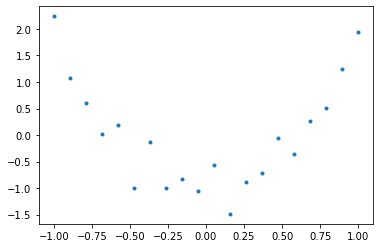

In [288]:
y_scaled = (y-np.mean(y))/np.std(y)
plt.plot(x,y_scaled, ".")

(2, 400)
(1, 400)


/tmp/ipykernel_4256/4120873314.py:126: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


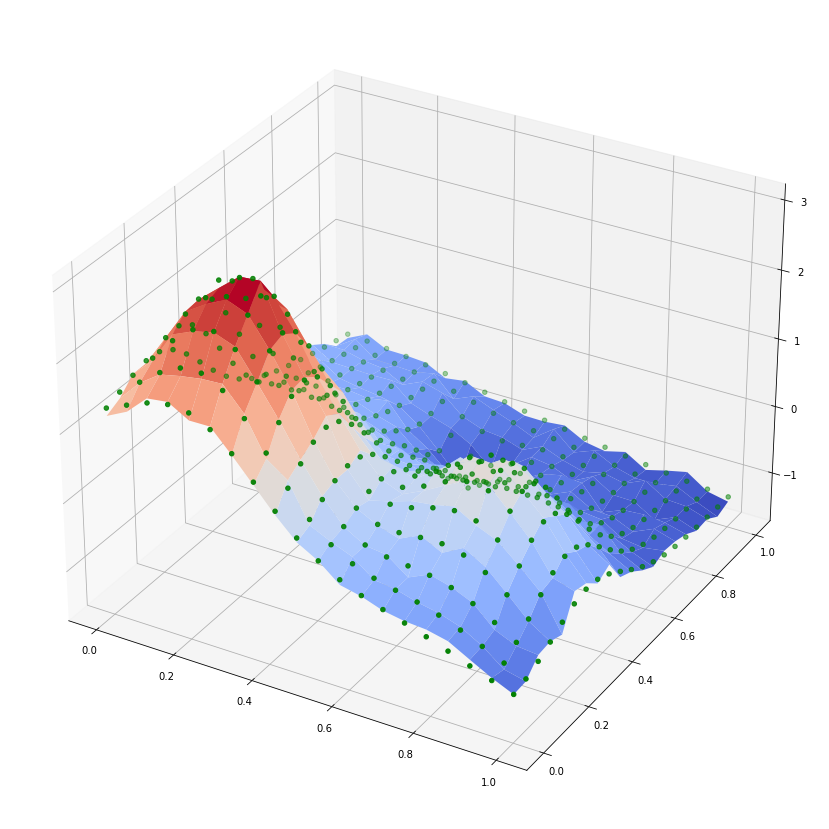

In [289]:
np.random.seed(1)
def heaviside(z):
    return np.where(z<0, 0, z)

def heaviside_deriv(z):
    return np.where(z<0, 0, 1)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_deriv(z):
    return (sigmoid(z) * (1-sigmoid(z)))



# x = np.linspace(-10,10,100)
# # y = x**2 -x**5 + 0.1 * np.random.normal(0,1,len(x))
# y = np.sin(x) + 0.1 * np.random.normal(0,1,len(x))
# y = (y-np.mean(y))/np.std(y)
# n_features = len(x)
# n_outputs = len(x)
# x = x[:, np.newaxis].T
# y = y[:, np.newaxis].T

x = X_data.T
y = Y_data[:,np.newaxis].T
n_inputs = x.shape[0]
n_features = x.shape[1]
n_outputs = y.shape[1]
print(x.shape)
print(y.shape)
# print(y.shape)

hidden_neurons = 100
m = hidden_neurons
hidden_weights = np.random.randn(n_features, m)
hidden_bias = np.zeros(m) + 0.01

output_weights = np.random.randn(m,n_outputs)
output_bias = np.zeros(n_outputs) + 0.01
# print(hidden_weights.shape)
# print(hidden_bias.shape)
# print(output_weights.shape)
# print(output_bias.shape)



def predict(X):
    z_h = X @ hidden_weights + hidden_bias
    a_h = sigmoid(z_h)
    z_o = a_h @ output_weights + output_bias
    output = (z_o-np.mean(z_o))/np.std(z_o)
    return output

def feed_forward_train(X):
    z_h = X @ hidden_weights + hidden_bias
    a_h = sigmoid(z_h)
    z_o = a_h @ output_weights + output_bias
    output = (z_o-np.mean(z_o))/np.std(z_o)
    return a_h, output

def back_propagation(x, y):
    a_h, output = feed_forward_train(x)
    error_output = output - y 
    error_hidden = error_output @ output_weights.T * sigmoid_deriv(a_h)

    output_weights_gradient = a_h.T @ error_output
    output_bias_gradient = np.sum(error_output, axis=0)

    hidden_weights_gradient = x.T @ error_hidden
    hidden_bias_gradient = np.sum(error_hidden, axis=0)
    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

# def train(eta, lmbd, n):
#     for _ in range(n):
#         dWo, dBo, dWh, dBh = back_propagation(x, y)

#         # regularization term gradients
#         dWo += lmbd * output_weights
#         dWh += lmbd * hidden_weights
        
#         # update weights and biases
#         output_weights -= eta * dWo
#         output_bias -= eta * dBo
#         hidden_weights -= eta * dWh
#         hidden_bias -= eta * dBh

eta = 0.01
# lmbd = 0.01

# pred = predict(x)
# fig = plt.figure(figsize=(15,10))
# # plt.plot(x, y,".", label="data")
# plt.plot(x.T, y.T, ".", label="data")
# plt.plot(x.T, pred.T, label="first")

# train(eta, lmbd, 10)
N = 100
for _ in range(N):
    dWo, dBo, dWh, dBh = back_propagation(x, y)

    # regularization term gradients
    dWo += lmbd * output_weights
    dWh += lmbd * hidden_weights
    
    # update weights and biases
    output_weights -= eta * dWo
    output_bias -= eta * dBo
    hidden_weights -= eta * dWh
    hidden_bias -= eta * dBh
    
pred = predict(x)

# new_pred = predict(x)
# print(new_pred.shape)
# plt.plot(x.T, new_pred.T, label=f"n={N}")
# plt.legend()
# plt.show()


# print(print(pred))

zz_pred = np.reshape(pred[0], (20,20))

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, zz_pred, cmap="coolwarm")
scatter = ax.scatter(xx,yy,zz, color="green")
plt.show()
